<a href="https://colab.research.google.com/github/FerriSlebew/1320123003-data-mining/blob/main/Preprocessing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

print(df_titanic.info())
print(df_titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [ ]:
# 1. Eksplorasi data awal
print("Info dataset:")
print(df_titanic.info())
print("\nMissing values:")
print(df_titanic.isnull().sum())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

In [ ]:
# 2. Handling missing values
# Age - imputasi dengan median
imputer_median = SimpleImputer(strategy='median')
df_titanic['Age'] = imputer_median.fit_transform(df_titanic[['Age']])

# Cabin - hapus kolom (terlalu banyak missing values)
if 'Cabin' in df_titanic.columns:
  df_titanic = df_titanic.drop(columns=['Cabin'])

# Embarked - imputasi dengan modus
imputer_mode = SimpleImputer(strategy='most_frequent')
df_titanic['Embarked'] = imputer_mode.fit_transform(df_titanic[['Embarked']]).ravel()

In [ ]:
# 3. Encoding categorical variables
le = LabelEncoder()
df_titanic['Sex_encoded'] = le.fit_transform(df_titanic['Sex'])
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], prefix=['Embarked'])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,False,False,True


In [ ]:
# 4. Handling outliers pada Fare
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df_titanic['Fare_capped'] = np.where(df_titanic['Fare'] > upper_limit, upper_limit, df_titanic['Fare'])

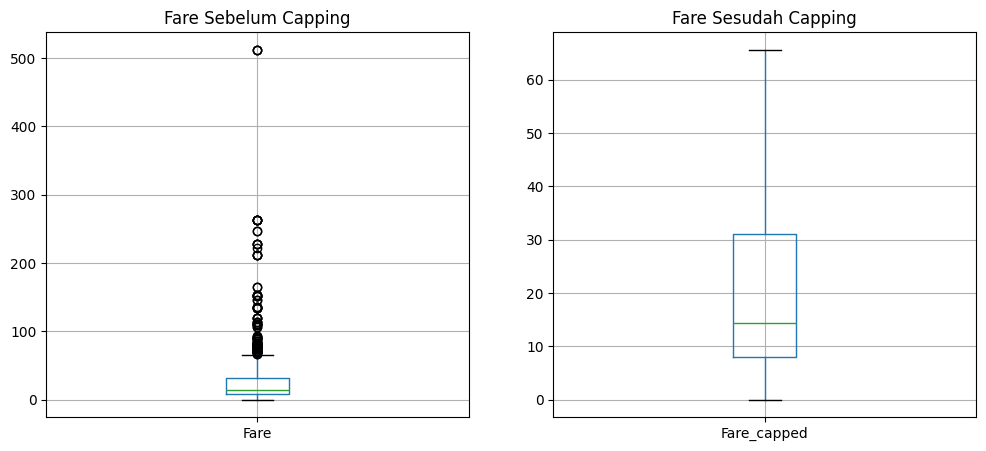

In [ ]:
import matplotlib.pyplot as plt

# Boxplot Fare sebelum capping
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df_titanic.boxplot(column='Fare')
plt.title("Fare Sebelum Capping")

# Boxplot Fare sesudah capping
plt.subplot(1,2,2)
df_titanic.boxplot(column='Fare_capped')
plt.title("Fare Sesudah Capping")

plt.show()

In [ ]:
# Handling outliers pada Age
Q1_age = df_titanic['Age'].quantile(0.25)
Q3_age = df_titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

upper_limit_age = Q3_age + 1.5 * IQR_age
lower_limit_age = Q1_age - 1.5 * IQR_age

df_titanic['Age_capped'] = np.where(
    df_titanic['Age'] > upper_limit_age, upper_limit_age,
    np.where(df_titanic['Age'] < lower_limit_age, lower_limit_age, df_titanic['Age'])
)


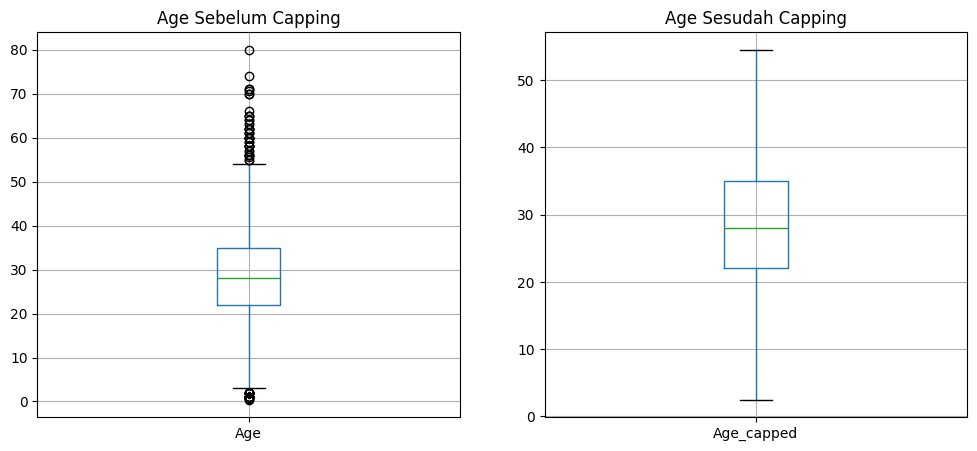

In [ ]:
# Hitung batas IQR untuk Age
Q1_age = df_titanic['Age'].quantile(0.25)
Q3_age = df_titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_limit_age = Q3_age + 1.5 * IQR_age
lower_limit_age = Q1_age - 1.5 * IQR_age

# Buat kolom baru Age_capped
df_titanic['Age_capped'] = np.where(
    df_titanic['Age'] > upper_limit_age, upper_limit_age,
    np.where(df_titanic['Age'] < lower_limit_age, lower_limit_age, df_titanic['Age'])
)

# Boxplot Age sebelum & sesudah capping
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df_titanic.boxplot(column='Age')
plt.title("Age Sebelum Capping")

plt.subplot(1,2,2)
df_titanic.boxplot(column='Age_capped')
plt.title("Age Sesudah Capping")

plt.show()


In [ ]:
print("\nSetelah preprocessing:")
print(df_titanic.info())


Setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Sex_encoded  891 non-null    int64  
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
 14  Fare_capped  891 non-null    float64
 15  Age_capped   891 non-null    float64
dtypes: bool(3), float64(4), int64(6), object(3)
memory usage: 93.2+ KB
None


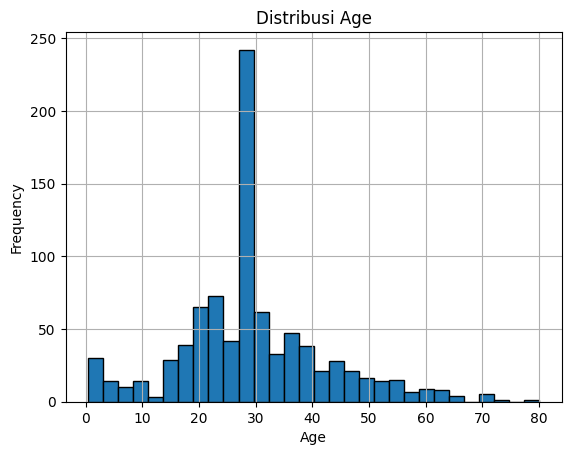

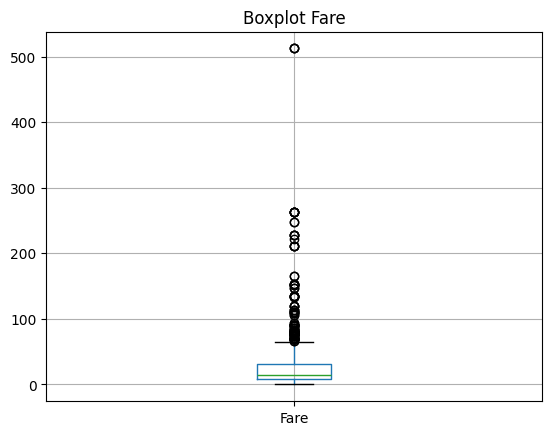

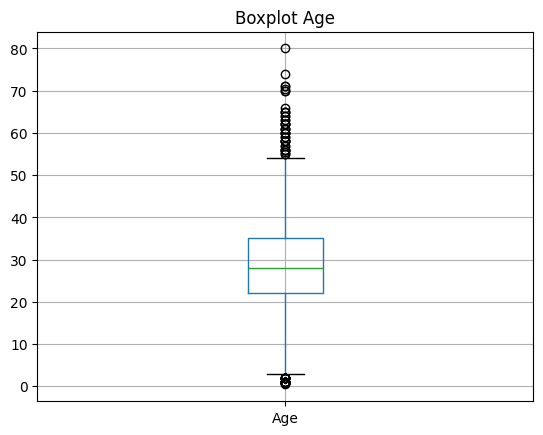

In [ ]:
import matplotlib.pyplot as plt

# Histogram distribusi Age
df_titanic['Age'].hist(bins=30, edgecolor='black')
plt.title("Distribusi Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot untuk Fare
df_titanic.boxplot(column='Fare')
plt.title("Boxplot Fare")
plt.show()

# Boxplot untuk Age
df_titanic.boxplot(column='Age')
plt.title("Boxplot Age")
plt.show()



# Laporan Singkat

*   Data sudah dibersihkan dari missing values
*   Outliers sudah ditangani
*   Variabel kategorikal sudah diencoding
*   Dataset siap digunakan untuk analisis/modeling